# Random Forest classification Group 13

# Imports 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time

# Loading the cleaned data
## Processing the features so the errors are not too big depending on the value
- [Normalising Data](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)

In [ ]:
spotify_df = pd.read_csv('../updated_spotify_data.csv')
selected_features = ['energy', 'loudness', 'liveness', 'instrumentalness', 'danceability']
spotify_df = spotify_df[selected_features]

# Min Max scaling to normalise the data
scaler = MinMaxScaler()
spotify_df[selected_features[:-1]] = scaler.fit_transform(spotify_df[selected_features[:-1]])

# Split data into training and testing sets
X = spotify_df[selected_features[:-1]]
y = spotify_df['danceability'] # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model and predict with random hyperparameters
## Random forests take quite some time to train, so we have measured the time taken
- [Classification Report](https://www.statology.org/sklearn-classification-report/) - Classification report knowledge

In [94]:
# Convert labels to binary classification based on threshold
threshold = 0.5
y_train_binary = np.where(y_train > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)

# Initialise Random Forest Classifier, add random initial hyperparameter (We will change these)
rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=50, min_samples_leaf=50,min_samples_split=10, random_state=42)

# Measure time taken to train the model
start_time = time.time()
rf_classifier.fit(X_train, y_train_binary)
end_time = time.time()
training_time = end_time - start_time

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model performace
accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)
f1_rf = f1_score(y_test_binary, y_pred_rf)
recall_rf = recall_score(y_test_binary, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test_binary, y_pred_rf)
classification_report_rf = classification_report(y_test_binary, y_pred_rf)

# Print metrics and training time
print(f"Accuracy: {accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Recall: {recall_rf}")
print(f"Confusion Matrix:\n{confusion_matrix_rf}")
print(f"Classification Report:\n{classification_report_rf}")
print(f"Training Time: {training_time} seconds")

Accuracy: 0.6933333333333334
F1 Score: 0.7603292867191164
Recall: 0.8253492449522086
Confusion Matrix:
[[ 6207  6112]
 [ 3088 14593]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57     12319
           1       0.70      0.83      0.76     17681

    accuracy                           0.69     30000
   macro avg       0.69      0.66      0.67     30000
weighted avg       0.69      0.69      0.68     30000

Training Time: 1.4605891704559326 seconds


# Plotting charts to visualise the model performace

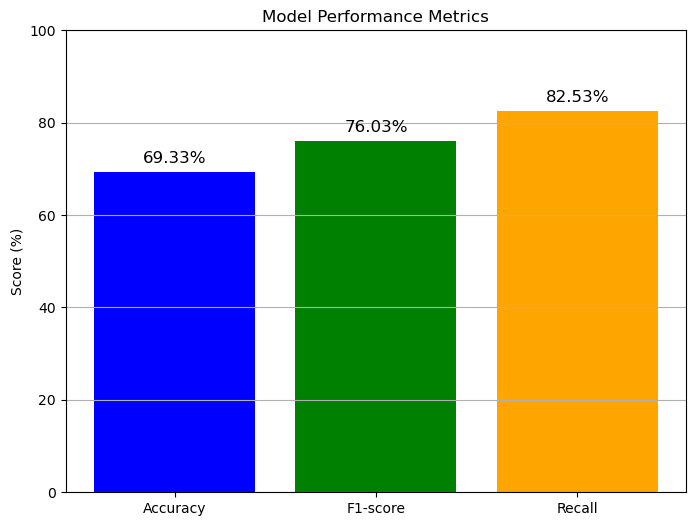

In [95]:
# Data for plotting
metrics = ['Accuracy', 'F1-score', 'Recall']
# Change to percentages for better visual representation
scores = [accuracy_rf * 100, f1_rf * 100, recall_rf * 100] 

# Bar plot for performance metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.title('Model Performance Metrics')
plt.ylabel('Score (%)')
plt.ylim(0, 100)  
plt.grid(axis='y')

# Show the scores on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score + 2, f'{score:.2f}%', ha='center', color='black', fontsize=12)

plt.show()


# Visualising the confusion matrix
- [Enumerate](https://www.w3schools.com/python/ref_func_enumerate.asp) - Enumerate function
- [Confusion Matrix](https://www.w3schools.com/python/python_ml_confusion_matrix.asp) - Confusion matrix

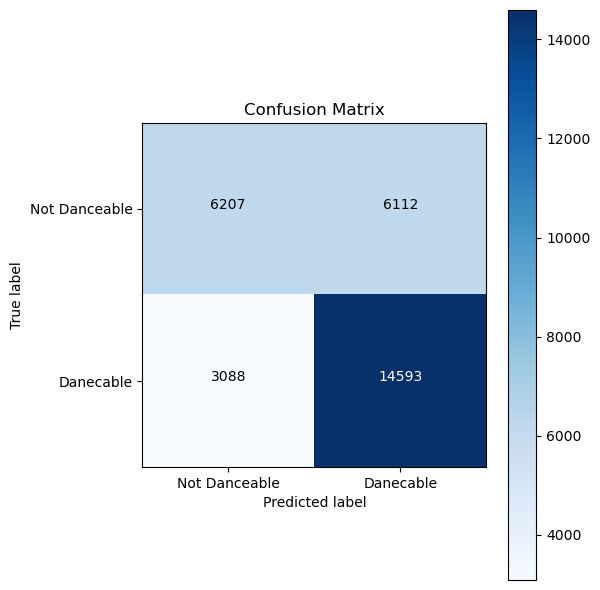

In [96]:
# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels and ticks
classes = ['Not Danceable', 'Danecable']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Display numerical values in cells
thresh = confusion_matrix_rf.max() / 2
for i in range(confusion_matrix_rf.shape[0]):
    for j in range(confusion_matrix_rf.shape[1]):
        plt.text(j, i, format(confusion_matrix_rf[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix_rf[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Storing the time taken to train and predict using the random forest


In [97]:

# Start timer
start_time = time.time()

# Train the model
rf_classifier.fit(X_train, y_train_binary)

# End timer and print training time
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Start timer
start_time = time.time()

# Predict on test set
y_pred_rf = rf_classifier.predict(X_test)

# End timer and print prediction time
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

Training Time: 1.54 seconds
Prediction Time: 0.03 seconds


# Difference between training and prediction time is quite significant

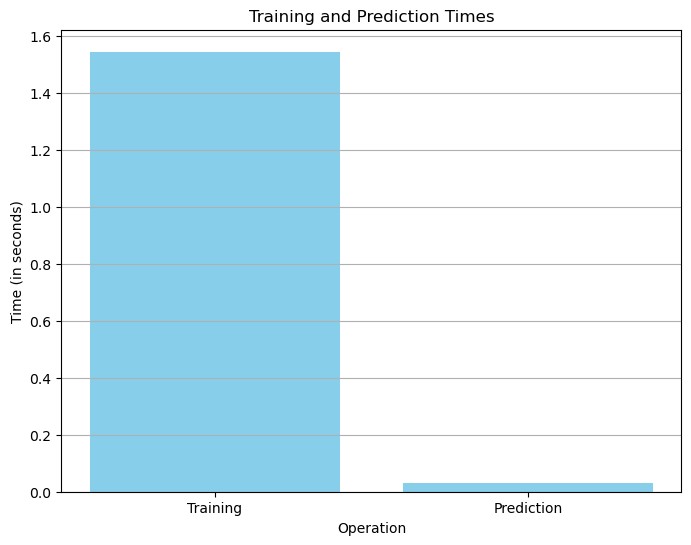

In [98]:
# Create a bar chart to visualise training and prediction times
times = [training_time, prediction_time]
labels = ['Training', 'Prediction']

plt.figure(figsize=(8, 6))
plt.bar(labels, times, color='skyblue')
plt.title('Training and Prediction Times')
plt.xlabel('Operation')
plt.ylabel('Time (in seconds)')
plt.grid(axis='y')
plt.show()

# Tune the number of estimators hyper parameter to find the best fit for the mode
- Trained on a range from 10 to 500
- Measured the accuracy, f1 score and recall
- Measured the training and prediction time
- [Tuning of hyper parameters](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/) - Knowledge of what variables to tune

In [99]:
# Define diffferent numbers of trees to test
n_estimators_list = [10,50,100, 200,250,300,350,400,450,500]

# Store metrics for each model
metrics = {'n_estimators': [], 'accuracy': [], 'f1_score': [], 'recall': []}

for n in n_estimators_list:
    # Initialise the Random Forest with the current number of trees
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    #Start timer
    start_time = time.time()
    # Train the model
    rf.fit(X_train, y_train_binary)
    training_time = time.time() - start_time
    # Predict on test set
    y_pred = rf.predict(X_test)
    
    # Store metrics
    metrics['n_estimators'].append(n)
    metrics['accuracy'].append(accuracy_score(y_test_binary, y_pred))
    metrics['f1_score'].append(f1_score(y_test_binary, y_pred))
    metrics['recall'].append(recall_score(y_test_binary, y_pred))
 

print(f"Training Time: {training_time:.2f} seconds")

# Plots of the model metrics for each value in the number of estimators array

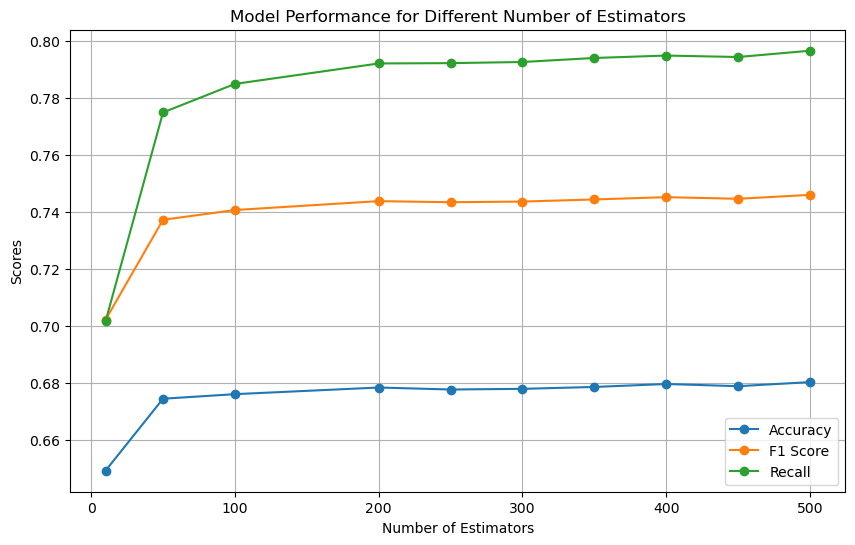

In [100]:
# Plot Accuracy v Number of Estimators
plt.figure(figsize=(10, 6))
plt.plot(metrics['n_estimators'], metrics['accuracy'], label='Accuracy', marker='o')
plt.plot(metrics['n_estimators'], metrics['f1_score'], label='F1 Score', marker='o')
plt.plot(metrics['n_estimators'], metrics['recall'], label='Recall', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Scores')
plt.title('Model Performance for Different Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

# Tuned the max depth hyperparameter for the best fit for our model
## Changed the number of estimators parameter to fit the best performing value from our previous test

In [103]:
# Define different values to test for max_depth
max_depth_list = [10, 20, 30, 40, 50]

# Store metrics for each model
max_depth_metrics = {'max_depth': [], 'accuracy': [], 'f1_score': [], 'recall': []}

for max_depth in max_depth_list:
    # Initialise the Random Forest with the current max_depth
    rf = RandomForestClassifier(n_estimators=200, max_depth=max_depth, random_state=42)
    
    # Start timer for training
    start_time = time.time()
    
    # Train the model
    rf.fit(X_train, y_train_binary)
    
    # End timer for training
    training_time = time.time() - start_time
    
    # Predict on the test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_binary, y_pred)
    
    # Store metrics
    max_depth_metrics['max_depth'].append(max_depth)
    max_depth_metrics['accuracy'].append(accuracy_score(y_test_binary, y_pred))
    max_depth_metrics['f1_score'].append(f1_score(y_test_binary, y_pred))
    max_depth_metrics['recall'].append(recall_score(y_test_binary, y_pred))

# Find the best max_depth based on accuracy
print(f"Training Time: {training_time:.2f} seconds")

Training Time: 44.73 seconds


# Plots of the models performance based on the max depth value

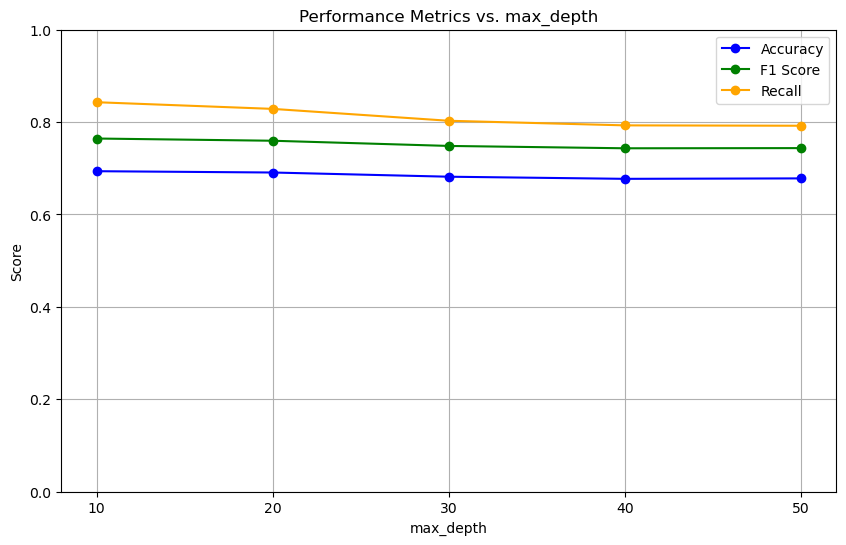

In [107]:
# Plot the values
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(max_depth_metrics['max_depth'], max_depth_metrics['accuracy'], marker='o', label='Accuracy', color='blue')
# Plot F1-score
plt.plot(max_depth_metrics['max_depth'], max_depth_metrics['f1_score'], marker='o', label='F1 Score', color='green')
# Plot recall
plt.plot(max_depth_metrics['max_depth'], max_depth_metrics['recall'], marker='o', label='Recall', color='orange')

plt.title('Performance Metrics vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.xticks(max_depth_list)
plt.grid(True)
plt.legend()
plt.show()

# Tuned the min samples hyperparameter for the best fit for our model
## Changed the number of estimators, max depth hyperparameter to fit the best performing value from our previous tests

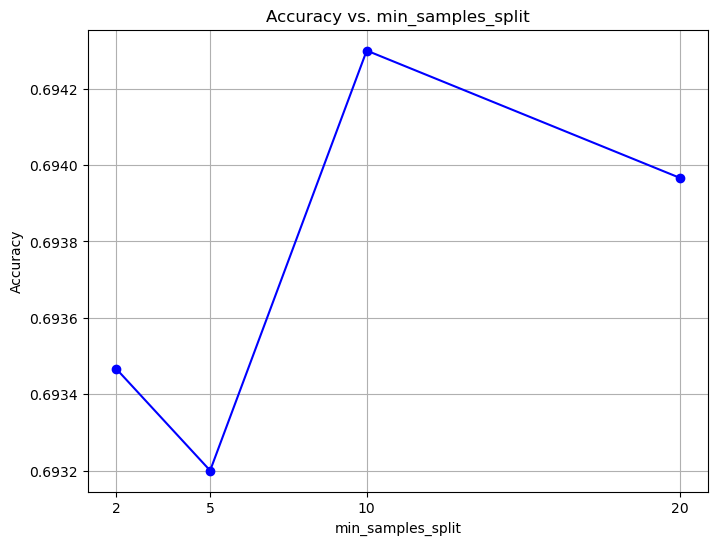

Training Time: 20.64 seconds


In [110]:
import matplotlib.pyplot as plt

# Define different values to test for min_samples_split
min_samples_split_list = [2, 5, 10, 20]

# Store metrics for each model
min_samples_split_metrics = {'min_samples_split': [], 'accuracy': []}

for min_samples_split in min_samples_split_list:
    # Initialize the Random Forest with the current min_samples_split
    rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=min_samples_split, random_state=42)
    
    # Start timer for training
    start_time = time.time()
    
    # Train the model
    rf.fit(X_train, y_train_binary)
    
    # End timer for training
    training_time = time.time() - start_time
    
    # Predict on the test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_binary, y_pred)
    
    # Store metrics
    min_samples_split_metrics['min_samples_split'].append(min_samples_split)
    min_samples_split_metrics['accuracy'].append(accuracy)

# Plot the accuracy values
plt.figure(figsize=(8, 6))
plt.plot(min_samples_split_metrics['min_samples_split'], min_samples_split_metrics['accuracy'], marker='o', color='blue')
plt.title('Accuracy vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(min_samples_split_list)
plt.show()

    
print(f"Training Time: {training_time:.2f} seconds")

# Tuned the max features hyperparameter for the best fit for our model
### Changed the number of estimators, max depth,min samples hyperparameter to fit the best performing value from our previous tests

In [113]:
# Define different values to test for max_features
max_features_list = [1.0, 0.5, 0.2, None]

# Store metrics for each model
max_features_metrics = []

for max_features in max_features_list:
    # Initialise the Random Forest with the current max_features
    rf = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_split=20, max_features=max_features, random_state=42)
    
    # Start timer for training
    start_time = time.time()
    
    # Train the model
    rf.fit(X_train, y_train_binary)
    
    # End timer for training
    training_time = time.time() - start_time
    
    # Predict on the test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_binary, y_pred)
    
    # Store max_features, accuracy, and training time
    max_features_metrics.append({'max_features': max_features, 'accuracy': accuracy, 'training_time': training_time})


print(f"Training Time: {training_time:.2f} seconds")

Training Time: 38.86 seconds


# Accuracy for max features

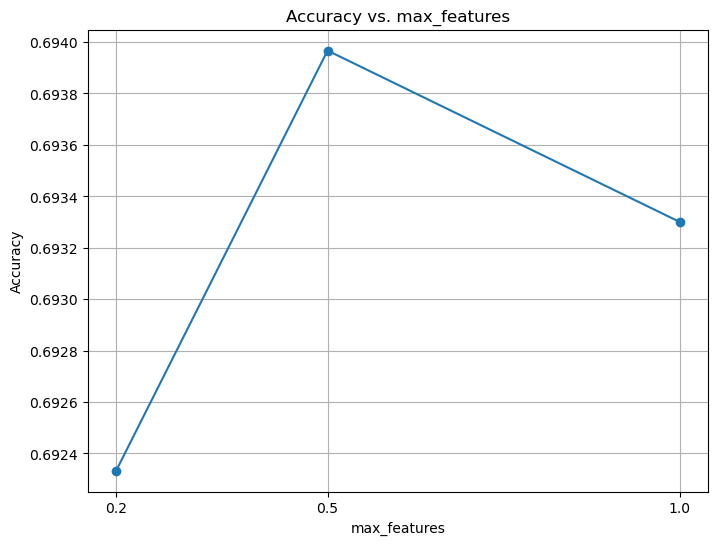

In [114]:
max_features_values = [entry['max_features'] for entry in max_features_metrics if entry['max_features'] is not None]
accuracy_values = [entry['accuracy'] for entry in max_features_metrics if entry['max_features'] is not None]

# Create a plot for max_features vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(max_features_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. max_features')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.xticks(max_features_values)
plt.grid(True)
plt.show()